In [1]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:

# 1. Create a small dataset (fake but logical)
# Features: Sugar (spoons), Milk (ml), TeaLeaves (grams), Water (ml)
data = {
    "Sugar":     [1, 2, 3, 4, 5, 2, 3, 4],
    "Milk":      [100, 150, 200, 250, 300, 180, 220, 260],
    "TeaLeaves": [1, 2, 2, 3, 3, 2, 3, 4],
    "Water":     [200, 220, 250, 300, 350, 230, 260, 320],
}
# Target: Taste score (how good the tea tastes, 1–100 scale)
# We "pretend" these are from human taste testers
taste = [40, 55, 65, 75, 85, 60, 70, 80]
df = pd.DataFrame(data)

In [4]:
df['Taste'] = taste
df.head()

,Sugar,Milk,TeaLeaves,Water,Taste
0,1,100,1,200,40
1,2,150,2,220,55
2,3,200,2,250,65
3,4,250,3,300,75
4,5,300,3,350,85


In [5]:
X = df[['Sugar','Milk','TeaLeaves','Water']]
Y = df['Taste']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
print("Slope(m1,m2,m3,m4)",model.coef_)
print("Intercept(c)",model.intercept_)

Slope(m1,m2,m3,m4) [ 2.72040302  0.19017632  2.92191436 -0.06675063]
Intercept(c) 28.841309823677506


In [7]:
new_tea = np.array([[1,180,3,150]])
predicted_taste = model.predict(new_tea)
predicted_taste

C:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([64.5465995])

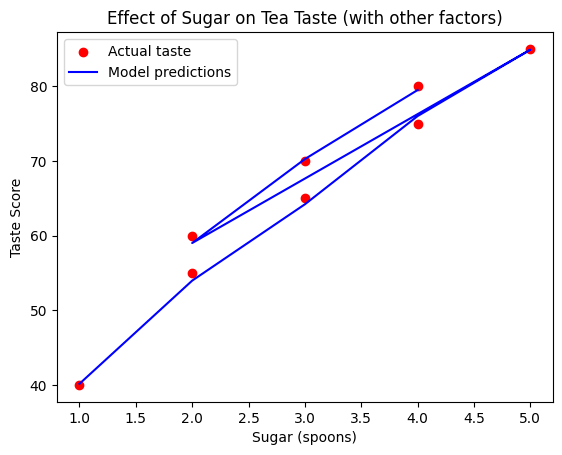

In [9]:
plt.scatter(df["Sugar"], Y, color="red", label="Actual taste")
plt.plot(df["Sugar"], model.predict(X), color="blue", label="Model predictions")
plt.xlabel("Sugar (spoons)")
plt.ylabel("Taste Score")
plt.title("Effect of Sugar on Tea Taste (with other factors)")
plt.legend()
plt.show() 